# Ban Raed Mohammad Al_Rawabdeh

# Import Libraries

In [11]:
#Read test data from a CSV file.
#Read training data from CSV file.
import pandas as pd 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

train_br=pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_br=pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')
train_br.head() 

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_(  char_freq_[  \
0             0.00            0.56  ...        0.101         0.00   
1             0.32            0.64  ...        0.160         0.00   
2             0.00            1.70  ...        0.055         0.11   
3             0.00            0.00  ...        0.108         0.00   
4             0.00            0.00  ...        0.746         0.00   

   char_freq_!  char_freq_$  char_freq_#  capital_run_length_average  \
0        0.606        0.000          0.0                       2.360   
1        1.178        0.107          0.0                       3.613   
2        0.000        0.000          0.0                       1.421   
3        0.000        0.108          0.0                       2.634   
4        0.000        0.000          0.0                       1.687   

   capital_run_length_longest  capital_run_length_total  spam    ID  
0                          19                       144     1    29  
1                          63                       318     1  3792  
2                           8                        91     0  1317  
3                          23                       303     0  3309  
4                           4                        27     0  3342  

[5 rows x 59 columns]

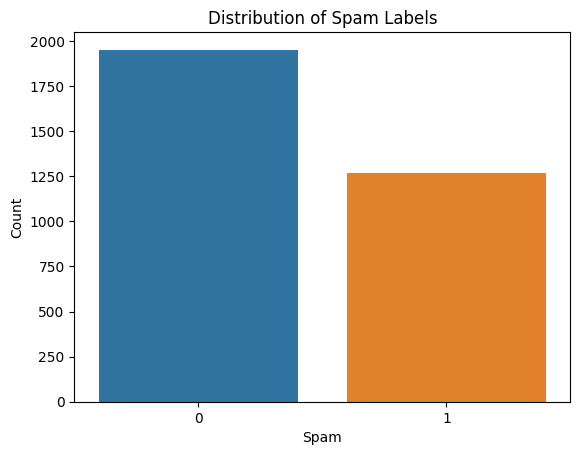

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='spam', data=train_br)
plt.title('Distribution of Spam Labels')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

# Data preparation

In [13]:
#X_train contains all features (columns) except the spam and ID columns.
#Y_train contains only the classification values (spam).
#X_test contains only the features without the ID column
X_train = train_br.drop(columns=['spam', 'ID'])
Y_train = train_br['spam']
X_test=test_br.drop(columns=['ID'])
print(X_train.head())
print(Y_train.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.56  ...                   0.0 

# Data partitioning

In [14]:
#Splitting the training data into a training set (80%) and an evaluation set (20%).
X_train, x_val, Y_train,y_val = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

# Training the model

In [15]:
#Create a random forest model with 100 trees and train it using the training data.
model_br = RandomForestClassifier(n_estimators=100, random_state=42)
model_br.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

# Model evaluation

In [16]:
#Predicting values using the evaluation set. Calculating and displaying model accuracy and classification report.
y_val_pred = model_br.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.96      0.95      0.95       240

    accuracy                           0.96       644
   macro avg       0.96      0.96      0.96       644
weighted avg       0.96      0.96      0.96       644



# Test prediction

In [17]:
#redicting values for test data
test_predictions = model_br.predict(X_test)

# Save the predictions

In [18]:
#Create a submission file that includes ID and predictions.
#Save DataFrame to CSV file
#Print confirmation message
#Show me the first five rows of the new table.
submission_br = pd.DataFrame({
    "ID": test_br['ID'],
    "spam": test_predictions
})
submission_br.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")
print(submission_br.head())


Submission file saved as 'submission.csv'
     ID  spam
0  1981     0
1  1940     0
2  4260     1
3  3200     1
4  3082     1
